In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report

from scipy.stats import skew

import warnings
warnings.filterwarnings("ignore")

In [2]:
# read data
df = pd.read_csv("data.csv")

In [3]:
df.shape

(50553, 12)

In [4]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [5]:
# renaming column
df.rename(columns={"Commision (in value)":"Commision"},inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 12 columns):
ID                      50553 non-null int64
Agency                  50553 non-null object
Agency Type             50553 non-null object
Distribution Channel    50553 non-null object
Product Name            50553 non-null object
Claim                   50553 non-null int64
Duration                50553 non-null int64
Destination             50553 non-null object
Net Sales               50553 non-null float64
Commision               50553 non-null float64
Gender                  14600 non-null object
Age                     50553 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


In [7]:
# check null values in data

In [8]:
df.isnull().sum()/len(df) * 100

ID                       0.000000
Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Claim                    0.000000
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision                0.000000
Gender                  71.119419
Age                      0.000000
dtype: float64

In [9]:
# Droping Gender and ID column
df.drop(["ID","Gender"],axis=1,inplace=True)

In [10]:
# categorical data
df_cat = df.select_dtypes(object)

In [11]:
df_cat.head()

,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,MALAYSIA
1,EPX,Travel Agency,Online,Cancellation Plan,SINGAPORE
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,MALAYSIA
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,INDONESIA
4,EPX,Travel Agency,Online,Cancellation Plan,"KOREA, REPUBLIC OF"


<AxesSubplot:xlabel='Agency', ylabel='count'>

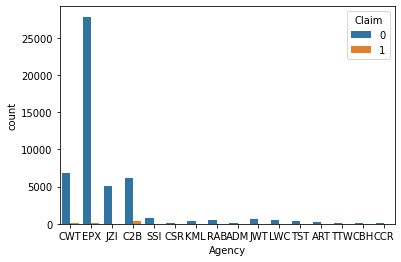

In [12]:
# EDA categorical data
sns.countplot(data=df,x="Agency",hue="Claim")

<AxesSubplot:xlabel='Agency Type', ylabel='count'>

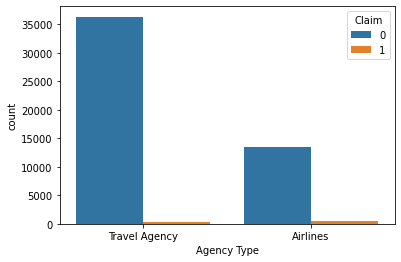

In [13]:
sns.countplot(data=df,x="Agency Type",hue="Claim")

<AxesSubplot:xlabel='Distribution Channel', ylabel='count'>

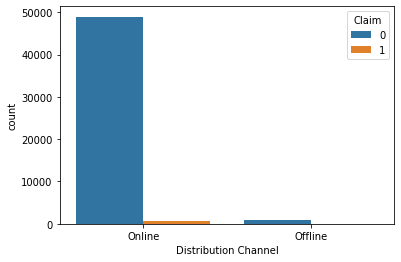

In [14]:
sns.countplot(data=df,x="Distribution Channel", hue="Claim")

In [15]:
df_cat.drop("Distribution Channel",axis=1,inplace=True)

<AxesSubplot:xlabel='count', ylabel='Product Name'>

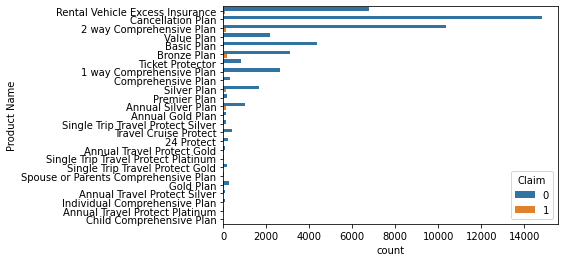

In [16]:
sns.countplot(data=df,y="Product Name",hue="Claim")

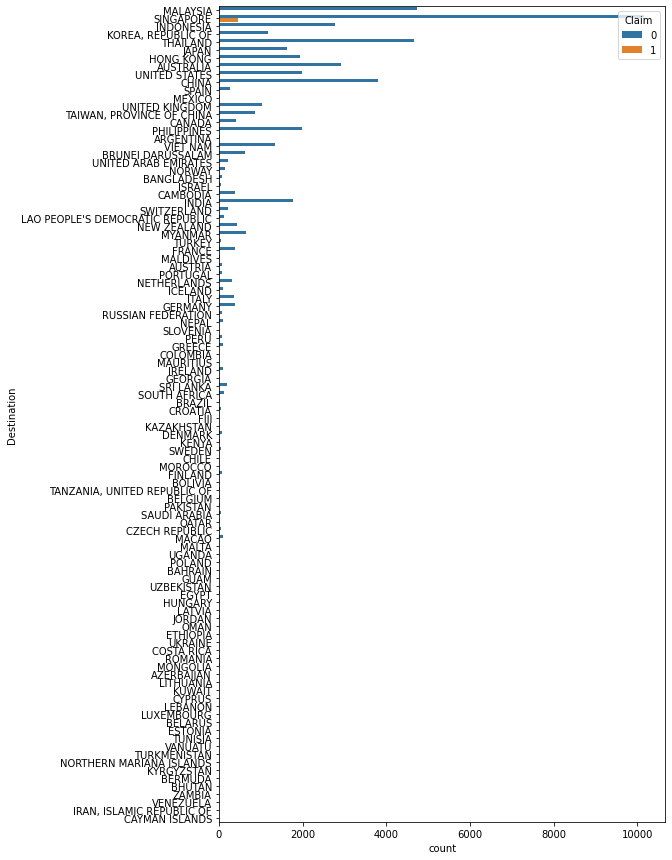

In [17]:
plt.figure(figsize=(8,15))
sns.countplot(data=df,y="Destination",hue="Claim")
plt.show()

In [18]:
# lot of levels in destination
df_cat.drop("Destination",axis=1,inplace=True)

In [19]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [20]:
df_cat.head()

,Agency,Agency Type,Product Name
0,6,1,16
1,7,1,10
2,6,1,16
3,7,1,1
4,7,1,10


In [21]:
# Numerical columns
df_num = df.select_dtypes(["int64","float64"]).drop("Claim",axis=1)

In [22]:
df_num.head()

,Duration,Net Sales,Commision,Age
0,7,0.0,17.82,31
1,85,69.0,0.00,36
2,11,19.8,11.88,75
3,16,20.0,0.00,32
4,10,15.0,0.00,29


In [23]:
df_num.describe()

,Duration,Net Sales,Commision,Age
count,50553.000000,50553.000000,50553.00000,50553.000000
mean,49.425969,40.800977,9.83809,40.011236
std,101.434647,48.899683,19.91004,14.076566
min,-2.000000,-389.000000,0.00000,0.000000
25%,9.000000,18.000000,0.00000,35.000000
50%,22.000000,26.500000,0.00000,36.000000
75%,53.000000,48.000000,11.55000,44.000000
max,4881.000000,810.000000,283.50000,118.000000


In [24]:
df[df_num["Duration"] < 0]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision,Age
4063,JZI,Airlines,Online,Basic Plan,0,-1,BRUNEI DARUSSALAM,18.0,6.3,118
38935,JZI,Airlines,Online,Basic Plan,0,-1,INDONESIA,18.0,6.3,118
48367,JZI,Airlines,Online,Basic Plan,0,-2,BANGLADESH,22.0,7.7,118


In [25]:
df[df["Destination"] == "BRUNEI DARUSSALAM"]["Duration"].mean()

22.8130081300813

In [26]:
df[df["Destination"] == "INDONESIA"]["Duration"].mean()

31.55276381909548

In [27]:
df[df["Destination"] == "BANGLADESH"]["Duration"].mean()

13.975903614457831

In [28]:
df_num.loc[4063,"Duration"] = 22.81
df_num.loc[38935,"Duration"] = 31.55
df_num.loc[48367,"Duration"] = 13.97

Duration 22.87238687706864


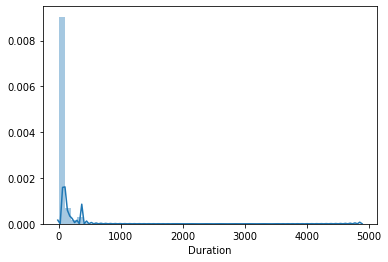

Net Sales 3.3281441910342053


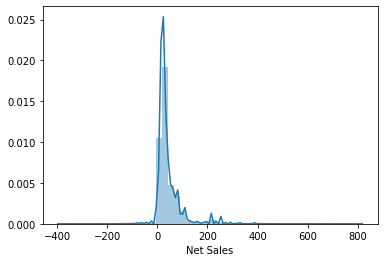

Commision 4.0780684356634636


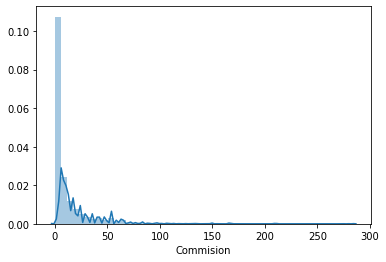

Age 2.9783898494112435


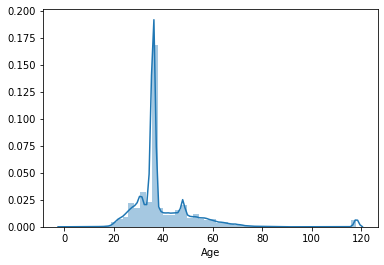

In [29]:
for col in df_num:
    print(col, skew(df_num[col]))
    plt.figure()
    sns.distplot(df_num[col])
    plt.show()

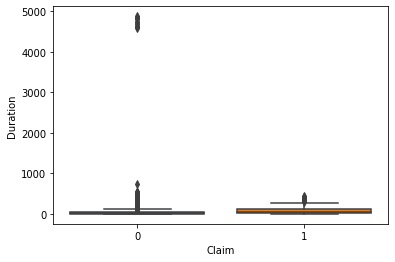

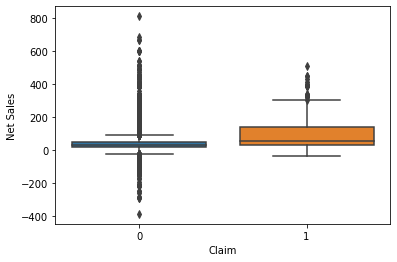

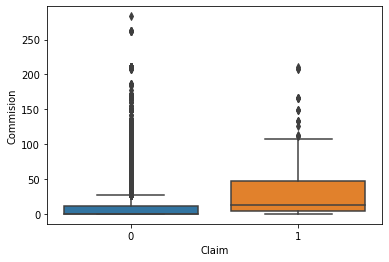

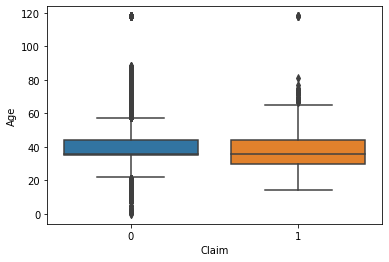

In [30]:
for col in df_num:
    plt.figure()
    sns.boxplot(df["Claim"],df_num[col])
    plt.show()

In [31]:
# baseline model

In [32]:
df_clean = pd.concat([df_cat,df_num],axis=1)

In [33]:
X = df_clean
y = df["Claim"]

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [35]:
dt = DecisionTreeClassifier()

In [36]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
y_pred = dt.predict(X_test)

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14961
           1       0.05      0.05      0.05       205

    accuracy                           0.97     15166
   macro avg       0.52      0.52      0.52     15166
weighted avg       0.97      0.97      0.97     15166



In [39]:
# standardization
for col in df_num:
    ss = StandardScaler()
    df_num[col] = ss.fit_transform(df_num[[col]])

In [40]:
df_clean = pd.concat([df_cat,df_num],axis=1)

In [41]:
df_clean.head()

,Agency,Agency Type,Product Name,Duration,Net Sales,Commision,Age
0,6,1,16,-0.418280,-0.834389,0.400903,-0.640165
1,7,1,10,0.350700,0.576677,-0.494132,-0.284961
2,6,1,16,-0.378845,-0.429475,0.102558,2.485628
3,7,1,1,-0.329551,-0.425385,-0.494132,-0.569124
4,7,1,10,-0.388703,-0.527636,-0.494132,-0.782247


In [42]:
X = df_clean
y = df["Claim"]

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [44]:
# Since data is highly imbalanced, creating samples
from imblearn.over_sampling import RandomOverSampler

In [45]:
ros = RandomOverSampler(random_state=1)

In [46]:
X_sample, y_sample = ros.fit_sample(X_train,y_train)

In [54]:
# Using Neural network
import tensorflow as tf

In [55]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Dense(8,input_shape=(X_sample.shape[1],),activation="sigmoid"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
    
])

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 64        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(optimizer='adam',
              loss='binary_crossentropy')

In [58]:
r = model.fit(X_sample, y_sample, epochs=20,batch_size=50)

Train on 69702 samples
Epoch 1/20
69702/69702 [==============================] - 4s 63us/sample - loss: 0.5545
Epoch 2/20
69702/69702 [==============================] - 4s 57us/sample - loss: 0.5144
Epoch 3/20
69702/69702 [==============================] - 4s 53us/sample - loss: 0.5095
Epoch 4/20
69702/69702 [==============================] - 4s 51us/sample - loss: 0.5059
Epoch 5/20
69702/69702 [==============================] - 4s 57us/sample - loss: 0.5025
Epoch 6/20
69702/69702 [==============================] - 4s 54us/sample - loss: 0.5001
Epoch 7/20
69702/69702 [==============================] - 4s 54us/sample - loss: 0.4983
Epoch 8/20
69702/69702 [==============================] - 4s 54us/sample - loss: 0.4969
Epoch 9/20
69702/69702 [==============================] - 4s 53us/sample - loss: 0.4960
Epoch 10/20
69702/69702 [==============================] - 4s 57us/sample - loss: 0.4950
Epoch 11/20
69702/69702 [==============================] - 5s 65us/sample - loss: 0.4943
Epoch 1

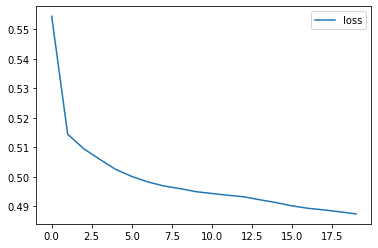

In [59]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.legend()

In [60]:
y_pred = model.predict(X_test)

In [61]:
y_pred = np.where(y_pred >= 0.5,1,0)

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.75      0.86     14961
           1       0.04      0.71      0.07       205

    accuracy                           0.75     15166
   macro avg       0.52      0.73      0.46     15166
weighted avg       0.98      0.75      0.85     15166

